In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sb  
from scipy.io import loadmat  
%matplotlib inline

In [2]:
raw_data = loadmat('data/ex6data1.mat')  
raw_data

{'X': array([[ 1.9643  ,  4.5957  ],
        [ 2.2753  ,  3.8589  ],
        [ 2.9781  ,  4.5651  ],
        [ 2.932   ,  3.5519  ],
        [ 3.5772  ,  2.856   ],
        [ 4.015   ,  3.1937  ],
        [ 3.3814  ,  3.4291  ],
        [ 3.9113  ,  4.1761  ],
        [ 2.7822  ,  4.0431  ],
        [ 2.5518  ,  4.6162  ],
        [ 3.3698  ,  3.9101  ],
        [ 3.1048  ,  3.0709  ],
        [ 1.9182  ,  4.0534  ],
        [ 2.2638  ,  4.3706  ],
        [ 2.6555  ,  3.5008  ],
        [ 3.1855  ,  4.2888  ],
        [ 3.6579  ,  3.8692  ],
        [ 3.9113  ,  3.4291  ],
        [ 3.6002  ,  3.1221  ],
        [ 3.0357  ,  3.3165  ],
        [ 1.5841  ,  3.3575  ],
        [ 2.0103  ,  3.2039  ],
        [ 1.9527  ,  2.7843  ],
        [ 2.2753  ,  2.7127  ],
        [ 2.3099  ,  2.9584  ],
        [ 2.8283  ,  2.6309  ],
        [ 3.0473  ,  2.2931  ],
        [ 2.4827  ,  2.0373  ],
        [ 2.5057  ,  2.3853  ],
        [ 1.8721  ,  2.0577  ],
        [ 2.0103  ,  2.3546  ],
   

In [3]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])  
data['y'] = raw_data['y']

In [4]:
positive = data[data['y'].isin([1])]  
negative = data[data['y'].isin([0])]

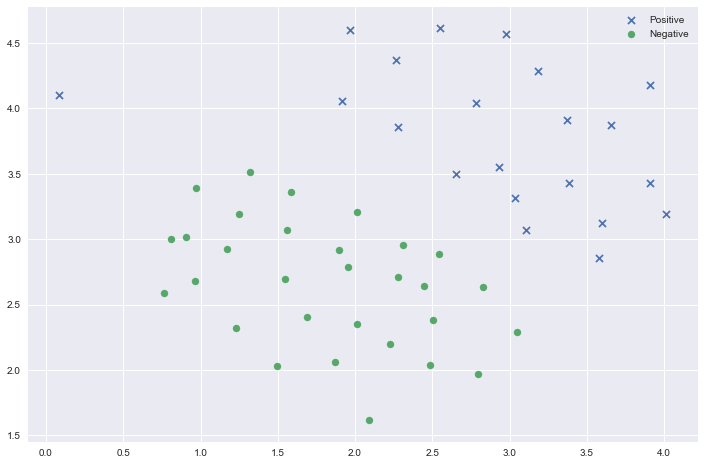

In [5]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')  
ax.legend()

Test C=1

In [6]:
from sklearn import svm  
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)  
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [7]:
svc.fit(data[['X1', 'X2']], data['y'])  
svc.score(data[['X1', 'X2']], data['y']) 

0.98039215686274506

In [8]:
svc2 = svm.LinearSVC(C=100, loss='hinge', max_iter=1000)  
svc2.fit(data[['X1', 'X2']], data['y'])  
svc2.score(data[['X1', 'X2']], data['y']) 

0.90196078431372551

In [9]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

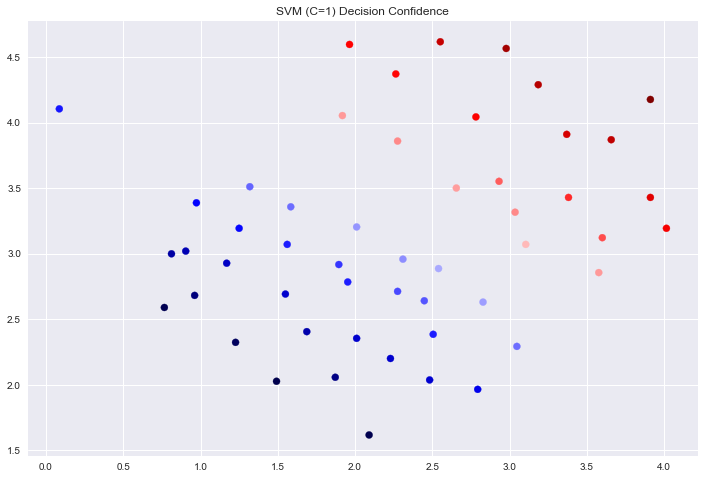

In [10]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')  
ax.set_title('SVM (C=1) Decision Confidence')

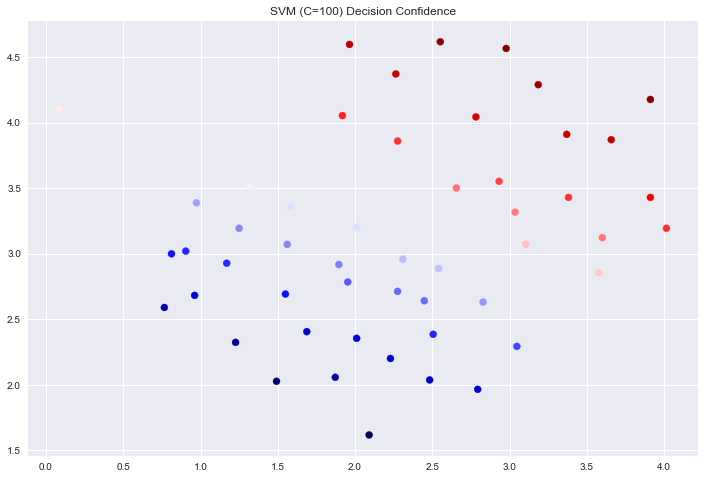

In [11]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')  
ax.set_title('SVM (C=100) Decision Confidence')

Nearly white / lighter points are close or directly adjacent to the hyperplane.

Let's move to something more complicated.

In [12]:
def gaussian_kernel(x1, x2, sigma):  
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))

In [13]:
x1 = np.array([1.0, 2.0, 1.0])  
x2 = np.array([0.0, 4.0, -1.0])  
sigma = 2

In [14]:
gaussian_kernel(x1, x2, sigma)

0.32465246735834974

Now look @ data w/ non-linear decision boundary

In [15]:
raw_data = loadmat('data/ex6data2.mat')

In [17]:
data = pd.DataFrame(raw_data['X'], columns=['X1','X2'])
data['y'] = raw_data['y']

In [18]:
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

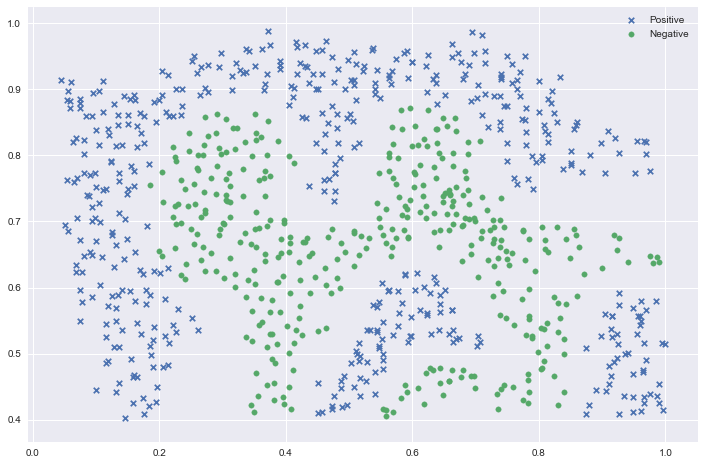

In [19]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')  
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')  
ax.legend()

We'll use the RBF kernel (https://en.wikipedia.org/wiki/Radial_basis_function_kernel) which is basically equivalent to the Gaussian.

In [20]:
svc = svm.SVC(C=100, gamma=10, probability=True)  
svc.fit(data[['X1', 'X2']], data['y'])  
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

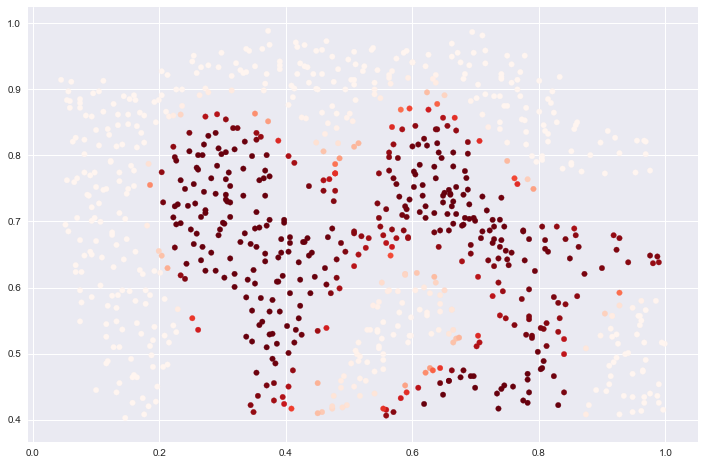

In [21]:
fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')

Grid search:

In [22]:
raw_data = loadmat('data/ex6data3.mat')

In [23]:
X = raw_data['X']  
Xval = raw_data['Xval']  
y = raw_data['y'].ravel()  
yval = raw_data['yval'].ravel()

In [24]:
C_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]  
gamma_values = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]

In [25]:
best_score = 0  
best_params = {'C': None, 'gamma': None}

In [ ]:
for C in C_values:  
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X, y)
        score = svc.score(Xval, yval)
        
        if score > best_score:
            # set parameters and score
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
            
best_score, best_params